<a href="https://colab.research.google.com/github/shailu1999/Cats_Vs_Dogs_Image_recognition/blob/master/catsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!unzip "/content/drive/My Drive/catsVsDogsDataset.zip"

Archive:  /content/drive/My Drive/catsVsDogsDataset.zip
replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

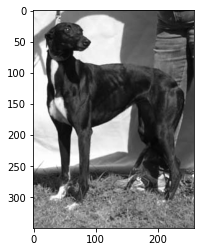

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#OpenCV-Python is a library of Python bindings designed to solve computer vision problems

DATADIR=r"/content/PetImages"
CATEGORIES=["Dog","Cat"] 

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)#path to cats or dogs dir
    #os.path.join() method in Python join one or more path components intelligently. 
    #This method concatenates various path components with exactly one directory 
    #separator (‘/’) following each non-empty part except the last path component.
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        #Use the function cv2.imread() to read an image. 
        #cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
        plt.imshow(img_array,cmap="gray")
        plt.show()  
        break
    break



In [31]:
print(img_array.shape)

(350, 259)


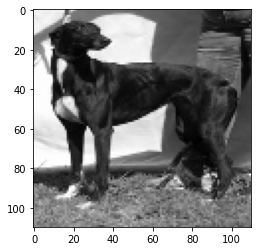

In [32]:
img_size=110

#img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [0]:
training_data=[]

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path) :
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array,(img_size,img_size)) 
            training_data.append([new_array,class_num])
        except Exception as e:
            pass #as some images are broken
            

In [34]:
print(len(training_data))

24946


In [0]:
import random

random.shuffle(training_data)#mix the images of cats and dogs

In [36]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
0
0
1
1
1


In [0]:
X=[]
y=[]

In [0]:
for features, label in training_data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,1)

In [0]:

import pickle#Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 

pickle_out=open("X.pickle","wb")#open pickle file in write mode
pickle.dump(X,pickle_out)#to put the dict into the open file
pickle_out.close()#write mode pickle file close

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [40]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
print(len(X))

24946


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X_in=np.array(pickle.load(open("X.pickle","rb")))
y_in=np.array(pickle.load(open("y.pickle","rb")))

print(len(X_in))
print(len(y_in))


24946
24946


In [42]:
#Normalize the data
X_in=X_in/255.0

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))#(3,3) - window size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64,(3,3))) #3,3 - window size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())#as CNN is 2D and Dense is 1D 
model.add(Dense(64))
          
model.add(Dense(1))
model.add(Activation('sigmoid'))#o/p layer

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(X_in,y_in,batch_size=16,epochs=10, validation_split=0.1)
          

Epoch 1/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.6702 - accuracy: 0.6079 - val_loss: 0.6139 - val_accuracy: 0.6649
Epoch 2/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.5743 - accuracy: 0.7046 - val_loss: 0.5521 - val_accuracy: 0.7267
Epoch 3/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.4953 - accuracy: 0.7672 - val_loss: 0.5337 - val_accuracy: 0.7335
Epoch 4/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.4456 - accuracy: 0.7929 - val_loss: 0.4713 - val_accuracy: 0.7868
Epoch 5/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.3971 - accuracy: 0.8220 - val_loss: 0.4907 - val_accuracy: 0.7752
Epoch 6/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.3493 - accuracy: 0.8472 - val_loss: 0.4689 - val_accuracy: 0.8012
Epoch 7/10
1404/1404 [==============================] - 10s 7ms/step - loss: 0.3027 - accuracy: 0.8686 - val_loss: 0.5024 - val_ac